In [69]:
import os
import pandas as pd

In [70]:
data_path = os.path.join(os.getcwd(), 'data', 'cleaned', 'full_data.csv')
df = pd.read_csv(data_path)
df.head()

,rendering_order,tag,attributes,text_context,depth,parent_index,parent_tag,text_length,sibling_index,link,...,attr_has_word_location,attr_has_word_link,text_has_word_name,text_has_word_date,text_word_time,text_word_description,text_word_location,label,event_id,source
0,61,A,unknown:menu-;-class:x-el x-el-a c1-3h c1-3i c...,home,17,60,Li,4,0,/,...,False,True,False,False,False,False,False,Other,NaN,gpacac.net_pattern_labeled
1,67,Span,NaN,about,21,66,Div,5,0,NaN,...,False,False,False,False,False,False,False,Other,NaN,gpacac.net_pattern_labeled
2,72,A,unknown:false-;-unknown:0b0ce34d-9252-4ec6-97f...,about,19,71,Li,5,0,/about,...,False,True,False,False,False,False,False,Other,NaN,gpacac.net_pattern_labeled
3,74,A,unknown:false-;-unknown:0b0ce34d-9252-4ec6-97f...,leadership,19,73,Li,10,0,/leadership,...,False,True,False,False,False,False,False,Other,NaN,gpacac.net_pattern_labeled
4,76,A,unknown:false-;-unknown:0b0ce34d-9252-4ec6-97f...,past presidents,19,75,Li,15,0,/past-presidents,...,False,True,False,False,False,False,False,Other,NaN,gpacac.net_pattern_labeled


In [71]:
print(f"Total number of entries : {df.shape[0]}")
print(f"Total number of labels  : {df.shape[1]}")

Total number of entries : 2764
Total number of labels  : 41


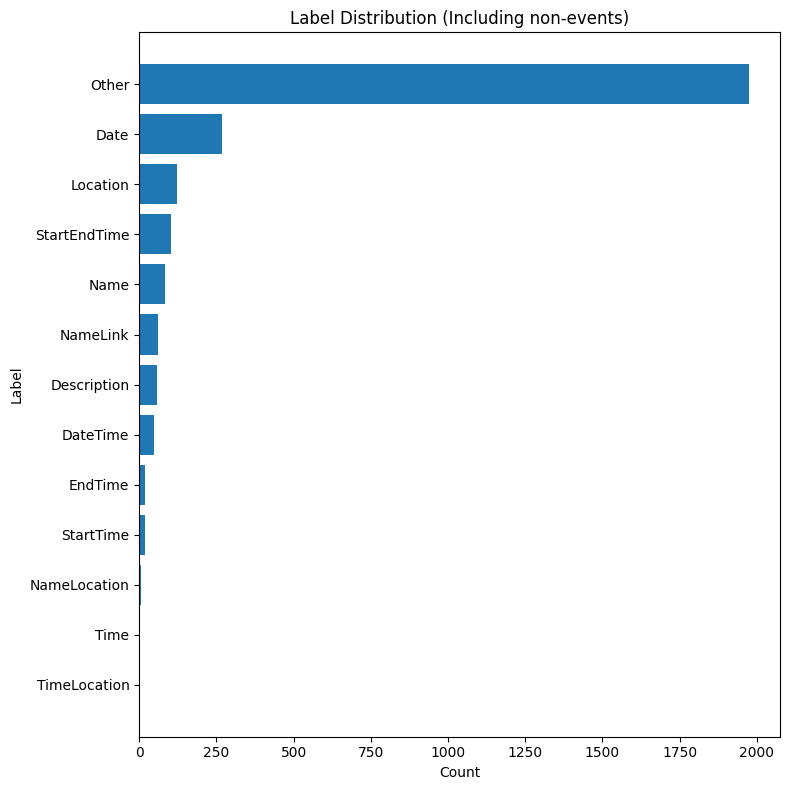

label
Other           0.714906
Date            0.096599
Location        0.043777
StartEndTime    0.037265
Name            0.030391
NameLink        0.021708
Description     0.020622
DateTime        0.017004
EndTime         0.007236
StartTime       0.006874
NameLocation    0.002171
Time            0.000724
TimeLocation    0.000724
Name: proportion, dtype: float64


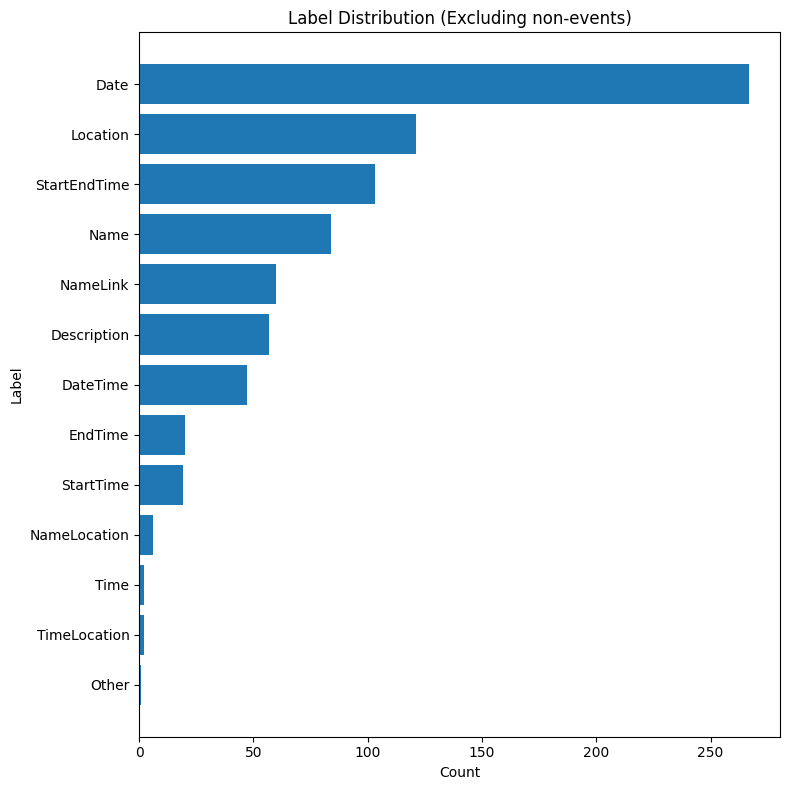

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#get a general idea of label distributions
label_counts = df["label"].value_counts()

plt.figure(figsize=(8,8))
plt.barh(label_counts.index[::-1], label_counts.values[::-1])

plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Label Distribution (Including non-events)")
plt.tight_layout()
plt.show()
print(df["label"].value_counts(normalize=True))


counts_event = df.loc[df["event_id"].notna(), 'label'].value_counts()
plt.figure(figsize=(8,8))
plt.barh(counts_event.index[::-1], counts_event.values[::-1])

plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Label Distribution (Excluding non-events)")
plt.tight_layout()
plt.show()

Total rows: 2764
Rows in events: 789 (28.55%)
Rows not in events: 1975 (71.45%)
Unique events: 42


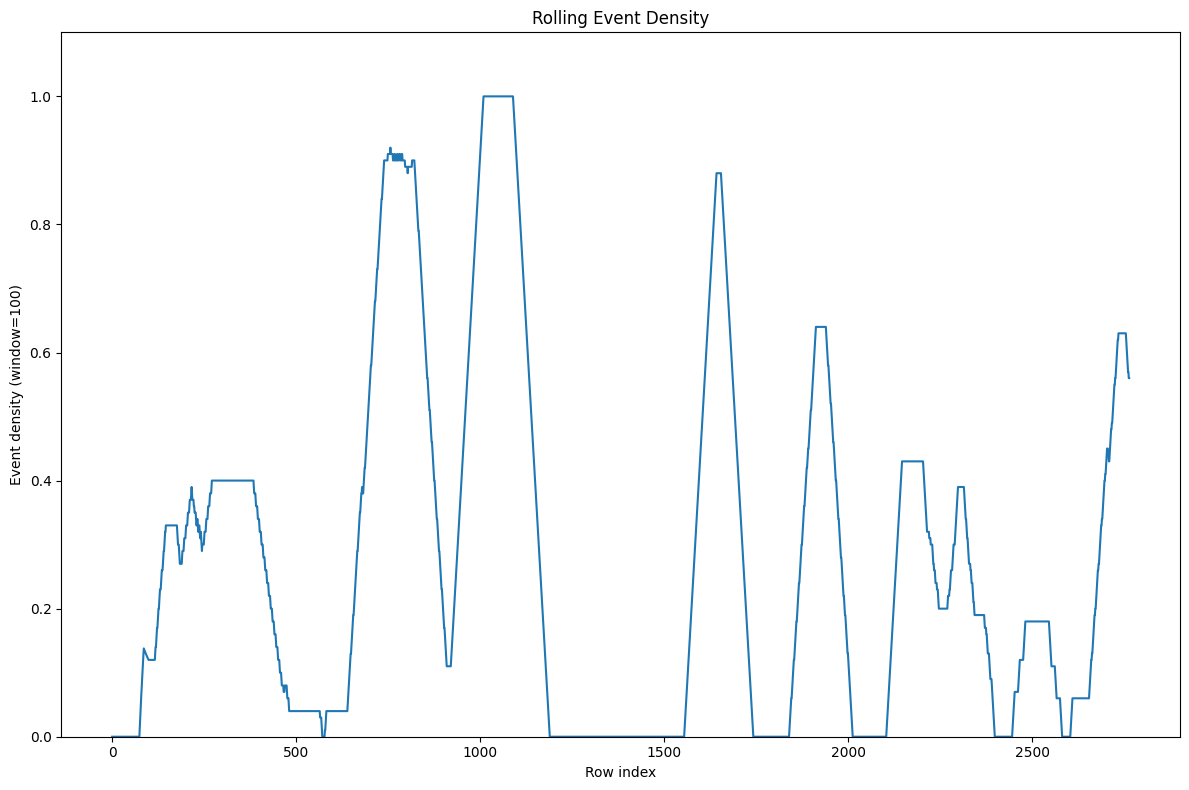

/tmp/ipykernel_4192/1803957532.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", 2)


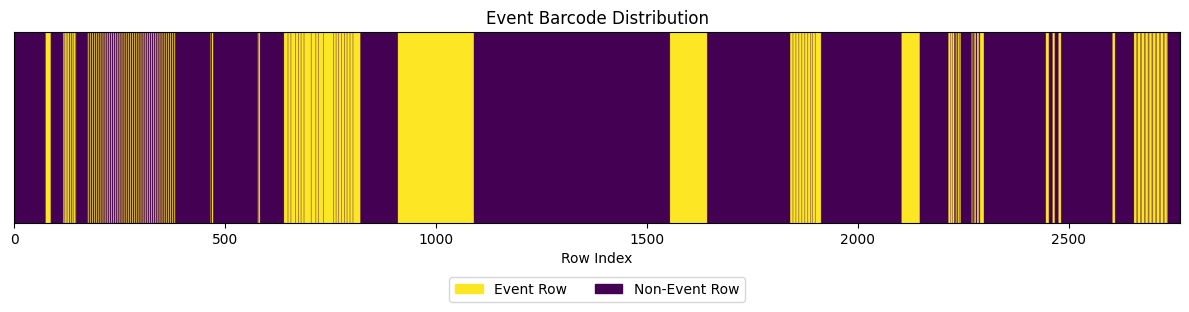

In [73]:
import matplotlib.patches as mpatches

total_rows = len(df)
event_mask = df["event_id"].notna()
event_rows = int(event_mask.sum())
non_event_rows = int((~event_mask).sum())
unique_events = df["event_id"].nunique(dropna=True)

print(f"Total rows: {total_rows}")
print(f"Rows in events: {event_rows} ({event_rows/total_rows:.2%})")
print(f"Rows not in events: {non_event_rows} ({non_event_rows/total_rows:.2%})")
print(f"Unique events: {unique_events}")

#rolling density plot to show general event density within structure. 
event_binary = df["event_id"].notna().astype(int)
density = event_binary.rolling(window=100, min_periods=1).mean()
plt.figure(figsize=(12, 8))
plt.plot(density.values)
plt.ylim(0, 1.1)
plt.xlabel("Row index")
plt.ylabel(f"Event density (window={100})")
plt.title("Rolling Event Density")
plt.tight_layout()
plt.show()

event_binary = df["event_id"].notna().astype(int).values
plt.figure(figsize=(12, 3.5))
cmap = plt.cm.get_cmap("viridis", 2)
plt.imshow(event_binary[np.newaxis, :], aspect="auto", cmap=cmap)
plt.yticks([])
plt.xlabel("Row Index")
plt.title("Event Barcode Distribution")
event_patch = mpatches.Patch(color=cmap(1), label="Event Row")
non_event_patch = mpatches.Patch(color=cmap(0), label="Non-Event Row")

plt.legend(
    handles=[event_patch, non_event_patch],
    loc="center",
    bbox_to_anchor=(0.5, -0.35),  # move further down
    ncol=2,
    frameon=True
)

plt.tight_layout()
plt.show()

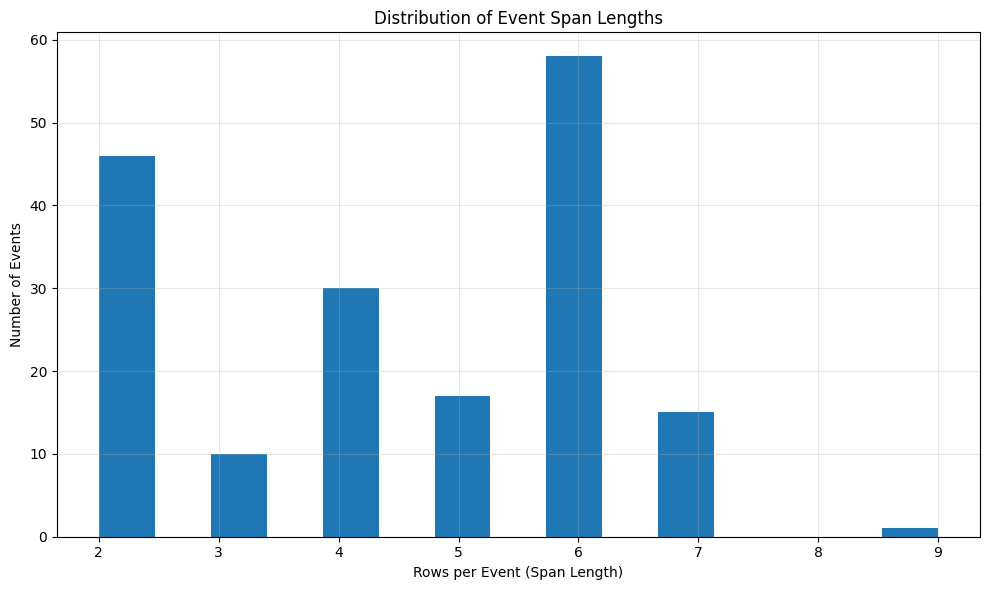

Total event instances: 177

Span length summary:
count    177.000000
mean       4.457627
std        1.793188
min        2.000000
25%        2.000000
50%        5.000000
75%        6.000000
max        9.000000
dtype: float64


In [ ]:
#plot event span distribution. 
#How many divs per event on average
event_df = df[df["event_id"].notna()].copy()

# Each event instance is uniquely (source, event_id)
span_lengths = (
    event_df
    .groupby(["source", "event_id"])
    .size()
    .sort_values(ascending=False)
)

#x positions for each event instance
x_positions = range(len(span_lengths))

plt.figure(figsize=(10, 6))
plt.hist(span_lengths.values, bins=15)
plt.xlabel("Rows per Event (Span Length)")
plt.ylabel("Number of Events")
plt.title("Distribution of Event Span Lengths")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Total event instances:", len(span_lengths))
print("\nSpan length summary:")
print(span_lengths.describe())